In [ ]:
!gdown 1qYV_OJsuHH5ulty80Pq331wfuyEvg9A_

Downloading...
From: https://drive.google.com/uc?id=1qYV_OJsuHH5ulty80Pq331wfuyEvg9A_
To: /content/1491423217564.json
100% 2.41M/2.41M [00:00<00:00, 219MB/s]


In [ ]:
import json

# File path
input_file = "/content/1491423217564.json"

# Target session
target_session = "1491423217564_18_/study/benefits_of_running_writing"

# Store extracted typing events
typing_events = []

# Load the whole JSON array at once
with open(input_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# Filter for textInput in the specific session
for entry in data:
    if (
        entry.get("type") == "textInput" and
        "benefits_of_running_writing" in entry.get("sessionId", "")
    ):
        typing_events.append({
            "char": entry["text"][-1] if entry["text"] else "",
            "full_text": entry["text"],
            "x": entry["pos"]["left"],
            "y": entry["pos"]["top"],
            "timestamp": entry["epoch"]
        })

# Output results
for e in typing_events:
    print(e)


{'char': '', 'full_text': '', 'x': 179, 'y': 297, 'timestamp': 1491423860865}
{'char': 'R', 'full_text': 'R', 'x': 190, 'y': 297, 'timestamp': 1491423861104}
{'char': 'u', 'full_text': 'Ru', 'x': 199, 'y': 297, 'timestamp': 1491423861311}
{'char': 'n', 'full_text': 'Run', 'x': 208, 'y': 297, 'timestamp': 1491423861503}
{'char': 'n', 'full_text': 'Runn', 'x': 217, 'y': 297, 'timestamp': 1491423861703}
{'char': 'i', 'full_text': 'Runni', 'x': 220, 'y': 297, 'timestamp': 1491423861879}
{'char': 'n', 'full_text': 'Runnin', 'x': 229, 'y': 297, 'timestamp': 1491423862063}
{'char': 'f', 'full_text': 'Runninf', 'x': 234, 'y': 297, 'timestamp': 1491423862095}
{'char': ' ', 'full_text': 'Runninf ', 'x': 238, 'y': 297, 'timestamp': 1491423862320}
{'char': 'i', 'full_text': 'Runninf i', 'x': 242, 'y': 297, 'timestamp': 1491423862551}
{'char': 'n', 'full_text': 'Runnin', 'x': 229, 'y': 297, 'timestamp': 1491423864471}
{'char': 'g', 'full_text': 'Running', 'x': 238, 'y': 297, 'timestamp': 1491423864

In [ ]:
!gdown 1livj2QN14pDy2WDkjcrIkrTrPZZXhnZx

Downloading...
From (original): https://drive.google.com/uc?id=1livj2QN14pDy2WDkjcrIkrTrPZZXhnZx
From (redirected): https://drive.google.com/uc?id=1livj2QN14pDy2WDkjcrIkrTrPZZXhnZx&confirm=t&uuid=6a6b05f4-d8fa-4af2-a9a3-a8159beb148f
To: /content/P_01.txt
100% 132M/132M [00:02<00:00, 64.1MB/s]


In [ ]:
import json
import pandas as pd

# Load typing timestamps and get range
typing_df = pd.DataFrame(typing_events)
typing_df['timestamp'] = pd.to_datetime(typing_df['timestamp'], unit='ms')

start_time = int(typing_df['timestamp'].min().timestamp() * 1000) - 200  # add margin
end_time = int(typing_df['timestamp'].max().timestamp() * 1000) + 200

# Load and filter gaze data
gaze_file = "/content/P_01.txt"
gaze_matches = []

with open(gaze_file, "r", encoding="utf-8") as f:
    for line in f:
        try:
            entry = json.loads(line)
            ts_ms = int(entry.get("true_time", 0) * 1000)

            # Basic validation
            x, y = entry["right_gaze_point_on_display_area"]
            if not (0 <= x <= 1) or not (0 <= y <= 1):
                continue  # skip invalid points

            if start_time <= ts_ms <= end_time:
                gaze_matches.append({
                    "timestamp": ts_ms,
                    "x_norm": x,
                    "y_norm": y
                })
        except (json.JSONDecodeError, KeyError, TypeError):
            continue

# Optional sanity check
print(f"Extracted {len(gaze_matches)} gaze points.")
print("Example:", gaze_matches[:3])


Extracted 8010 gaze points.
Example: [{'timestamp': 1491423860975, 'x_norm': 0.42252522706985474, 'y_norm': 0.7482141256332397}, {'timestamp': 1491423861017, 'x_norm': 0.40875038504600525, 'y_norm': 0.7378613352775574}, {'timestamp': 1491423861025, 'x_norm': 0.26750680804252625, 'y_norm': 0.6483697295188904}]


Correlation after interpolation (X): 0.7846389496103476
Correlation after interpolation (Y): nan


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


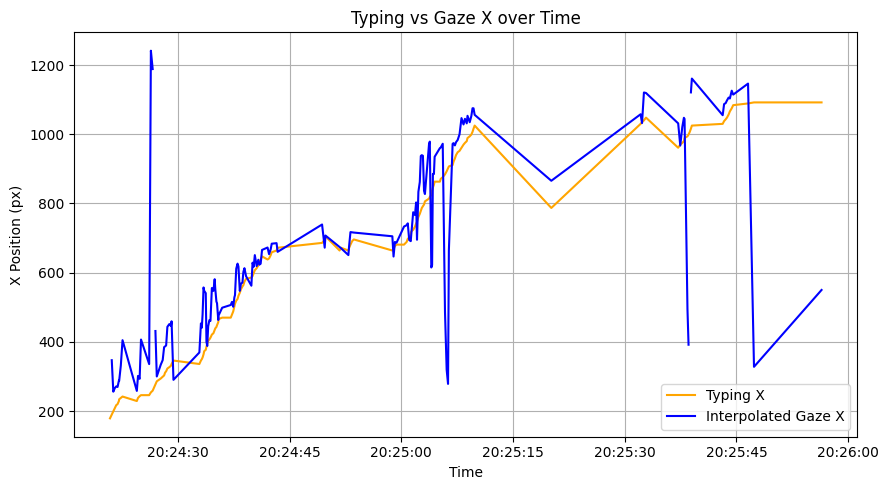

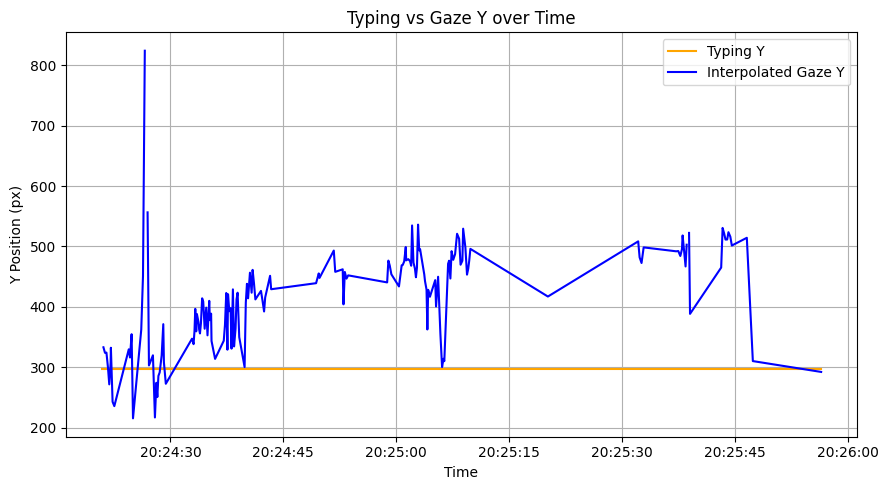

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Config
screen_width = 1440
screen_height = 900

#Typing Data
typing_df = pd.DataFrame(typing_events)
typing_df['timestamp'] = pd.to_datetime(typing_df['timestamp'], unit='ms')

#Gaze Data
gaze_df = pd.DataFrame(gaze_matches)
gaze_df['x_px'] = gaze_df['x_norm'] * screen_width
gaze_df['y_px'] = gaze_df['y_norm'] * screen_height
gaze_df['timestamp'] = pd.to_datetime(gaze_df['timestamp'], unit='ms')

#Interpolation
gaze_df.set_index('timestamp', inplace=True)
gaze_df = gaze_df[~gaze_df.index.duplicated(keep='first')]
interp_gaze = gaze_df[['x_px', 'y_px']].sort_index().interpolate(method='time')

#Align gaze with typing timestamps
aligned_gaze = interp_gaze.reindex(typing_df['timestamp'], method='nearest', tolerance=pd.Timedelta(milliseconds=50))
typing_df['gaze_x_px'] = aligned_gaze['x_px'].values
typing_df['gaze_y_px'] = aligned_gaze['y_px'].values

#Compute distance
typing_df['gaze_distance'] = np.sqrt(
    (typing_df['x'] - typing_df['gaze_x_px'])**2 +
    (typing_df['y'] - typing_df['gaze_y_px'])**2
)

#Correlation
x_corr = typing_df['x'].corr(typing_df['gaze_x_px'])
y_corr = typing_df['y'].corr(typing_df['gaze_y_px'])
print("Correlation after interpolation (X):", x_corr)
print("Correlation after interpolation (Y):", y_corr)

#Plot X
plt.figure(figsize=(9, 5))
plt.plot(typing_df['timestamp'], typing_df['x'], label='Typing X', color='orange')
plt.plot(typing_df['timestamp'], typing_df['gaze_x_px'], label='Interpolated Gaze X', color='blue')
plt.xlabel("Time")
plt.ylabel("X Position (px)")
plt.title("Typing vs Gaze X over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Plot Y
plt.figure(figsize=(9, 5))
plt.plot(typing_df['timestamp'], typing_df['y'], label='Typing Y', color='orange')
plt.plot(typing_df['timestamp'], typing_df['gaze_y_px'], label='Interpolated Gaze Y', color='blue')
plt.xlabel("Time")
plt.ylabel("Y Position (px)")
plt.title("Typing vs Gaze Y over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("🧪 Missing values in typing_df['y']:", typing_df['y'].isnull().sum())
print("🧪 Missing values in gaze_y_px:", typing_df['gaze_y_px'].isnull().sum())
print("🧪 Unique values in typing Y:", typing_df['y'].nunique())
print("🧪 Unique values in gaze Y:", typing_df['gaze_y_px'].nunique())


🧪 Missing values in typing_df['y']: 0
🧪 Missing values in gaze_y_px: 3
🧪 Unique values in typing Y: 1
🧪 Unique values in gaze Y: 164


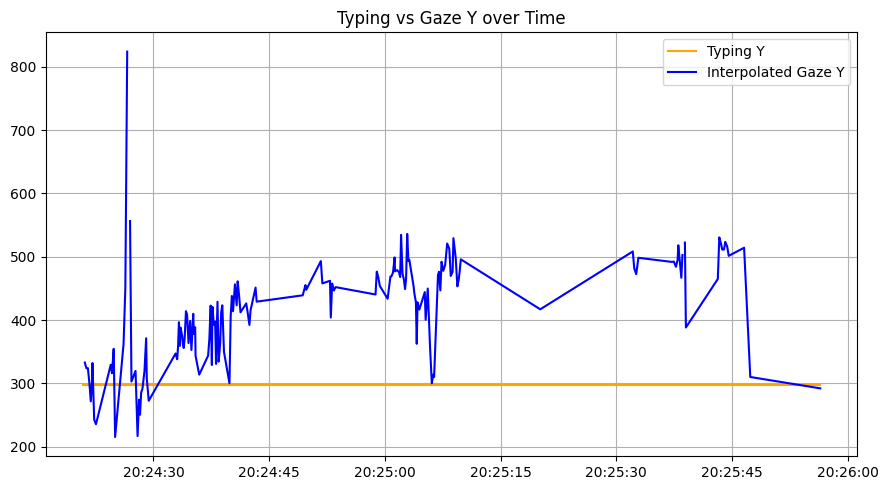

In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(typing_df['timestamp'], typing_df['y'], label='Typing Y', color='orange')
plt.plot(typing_df['timestamp'], typing_df['gaze_y_px'], label='Interpolated Gaze Y', color='blue')
plt.title("Typing vs Gaze Y over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
